## **Most Streamed Spotify Songs 2023**

### **Introduction**

The dataset contains lists of the most popular songs from the music streaming app **Spotify**. This dataset contains information for the track title, track artist(s), release date, musical ratings, BPM, musical keys, and streaming performance from other platforms such as Apple Music, Deezer, and Shazam.

The dataset's summary of features are shown below:

Column Name | Description |
-----|-----|
track_name  |name of the song|
artist(s)_name |name of the artist(s) of the song|
artist_count |number of artists contributing to the song|
released_year   |year the song is released|
released_month  |month the song is released|
released_day    |day of the month the song is released|
in_spotify_playlists    |number of Spotify playlists the songs is included in|
in_spotify_charts   |presence and rank of the song in Spotify charts|
streams |total number of streams in Spotify|
in_apple_playlists    |number of Apple Music playlists the songs is included in|
in_apple_charts   |presence and rank of the song in Apple Music charts|
in_deezer_playlists    |number of Deezer playlists the songs is included in|
in_deezer_charts   |presence and rank of the song in Deezer charts|
in_shazam_charts   |presence and rank of the song in Shazam charts|
bpm |Beats per Minute, a measure of song tempo|
key |key of the song|
mode    |mode of the song (Major or Minor)|
danceability_%  |percentage indicating how suitable the song is for dancing|
valence_%   |positivity of the song's musical content|
energy_%    |perceived energy level of the song|
acousticness_%  |amount of acoustic sound in the song|
instrumentalness_%  |amount of instrumental content in the song|
liveness_%  |presence of live performance elements|
speechiness_%   |amount of spoken words in the song|



**Additional Notes for Musical Ratings**

- danceability_% - A value of 0 is least danceable, and 100 as most danceable.
- valence_% - Low valence sound more negative (e.g: sad, depressing, angry), while high valence sound more positive (e.g: happy, cheerful, euphoric)
- energy_% - Higher value sounds more energetic.
- acousticness_% - 100 represents high confidence the track is acoustic.
- instrumentalness_% - The closer the instrumentalness values is to 100, the greater likelihood the track contains no vocal content (ooh and aah sounds are treated as instrumental). Values above 50 are intended to represent instrumental tracks.
- liveness_% - higher liveness values represent an increased probability that the track is performed live. A value above 80 provides strong likelihood that the track is live.
- speechiness_% - Values above 66 describe tracks that are probably made entirely of spoken words. Values between 33 and 66 describe tracks that may contain both music and speech, including rap music.

### **Import Libraries and Dataset**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import seaborn.objects as so

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df = pd.read_csv("D:\Documents\CSV Datasets\Spotify Songs\spotify-2023.csv", encoding='latin-1')

### **Data Preparation and Data Cleaning**

In [6]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


#### Null values

- The dataset contains null values from the columns **`in_shazam_charts`** and **`key`**. For the null values in the **`in_shazam_charts`** column, it is possible that these songs have the most number of streams but did not hit the charts in Shazam. 
- For the null values in the **`key`** column, based on [Spotify for Developers - Get Track's Audio Features](https://developer.spotify.com/documentation/web-api/reference/get-audio-features), the key of the song can be converted into **integers** using the standard [Pitch Class Notation](https://en.wikipedia.org/wiki/Pitch_class). The null values for the `key` column will have a value of **-1**.

#### Incorrect datatypes

- The following columns have incorrect datatypes:
  - streams
  - in_deezer_playlists
  - in_shazam_charts
  
  The datatype for these columns will be converted into **int64.**

#### Pitch Class Notation

Pitch Class | Tonal Counterparts |
-----|-----|
0 |C  |
1 |C# |
2 |D  |
3 |D# |
4 |E  |
5 |F  |
6 |F# |
7 |G  |
8 |G# |
9 |A  |
10  |A# |
11  |B  |

#### Additional Column

- A new column will be created to classify a track's placement in the charts. There will four (4) additional columns with the following metrics for rating a track's placement:
  - 0                 - Uncharted
  - 1 - 10            - Top 10
  - 11 - 50           - Top 50
  - 51 - 100          - Top 100
  - 101 - 200         - Top 200
  - Greater than 200  - Charted

In [9]:
## Replace null values in 'in_shazam_charts' column into 0
df['in_shazam_charts'].fillna(0, inplace=True)

## Replace invalid data in the 'stream' column into null
df['streams'] = df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

## Replace null values in 'key' column into 'none'
df['key'] = df['key'].fillna(-1)

In [10]:
## Drop the null value in the 'streams' column
df = df.dropna(how='any')

print(df.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


In [11]:
## Remove the comma (,) for some values in columns 'in_deezer_playlists' and 'in_shazam_charts' and convert them into int64
df['in_deezer_playlists'] = df['in_deezer_playlists'].replace(',', '', regex=True).astype('int64')
df['in_shazam_charts'] = df['in_shazam_charts'].replace(',', '', regex=True).astype('int64')

## Change the datatype of 'streams' column into int64
df['streams'] = df['streams'].astype('int64')

In [12]:
## Change values in 'key' column into integers using Pitch Class Notation
pitch_class = {'C': 0,
               'C#': 1,
               'D': 2,
               'D#': 3,
               'E': 4,
               'F': 5,
               'F#': 6,
               'G': 7,
               'G#': 8,
               'A': 9,
               'A#': 10,
               'B': 11
               }

df['key'] = df['key'].map(pitch_class).fillna(-1)

In [13]:
## Create new columns for track's chart classification
def chart_cat(value):
    if value == 0:
        return 'Uncharted'
    elif 1 <= value <= 10:
        return 'Top 10'
    elif 11 <= value <= 50:
        return 'Top 50'
    elif 51 <= value <= 100:
        return 'Top 100'
    elif 101 <= value <= 200:
        return 'Top 200'
    else:
        return 'Charted'
    
for col_chart in ['in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts']:
    new_col_chart_name = col_chart + '_category'
    df[new_col_chart_name] = df[col_chart].apply(chart_cat)

In [14]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_spotify_charts_category,in_apple_charts_category,in_deezer_charts_category,in_shazam_charts_category
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,89,83,31,0,8,4,Top 200,Charted,Top 10,Charted
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,61,74,7,0,10,4,Top 50,Top 200,Top 50,Charted
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,32,53,17,0,31,6,Top 200,Charted,Top 50,Charted
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,58,72,11,0,11,15,Top 100,Charted,Top 50,Charted
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,23,80,14,63,11,6,Top 50,Top 200,Top 50,Charted


In [15]:
df['key'] = df['key'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   track_name                  952 non-null    object
 1   artist(s)_name              952 non-null    object
 2   artist_count                952 non-null    int64 
 3   released_year               952 non-null    int64 
 4   released_month              952 non-null    int64 
 5   released_day                952 non-null    int64 
 6   in_spotify_playlists        952 non-null    int64 
 7   in_spotify_charts           952 non-null    int64 
 8   streams                     952 non-null    int64 
 9   in_apple_playlists          952 non-null    int64 
 10  in_apple_charts             952 non-null    int64 
 11  in_deezer_playlists         952 non-null    int64 
 12  in_deezer_charts            952 non-null    int64 
 13  in_shazam_charts            952 non-null    int64 
 14 

### Descriptive Statistics

In [16]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,in_shazam_charts,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,...,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,385.535714,...,56.907563,122.553571,5.193277,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,1131.078760,...,157.513706,28.069601,3.701314,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,0.000000,65.000000,-1.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,...,0.000000,99.750000,2.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,44.000000,...,2.000000,121.000000,5.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,164.250000,...,33.250000,140.250000,8.000000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,...,1451.000000,206.000000,11.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


**Observations:**

Release Date

- The year of release of the latest song in the dataset is (of course) **2023**, with the oldest dating back to **1930**.

Popularity

- Some of the most streamed songs never landed in the charts.
- The most number of streams is **3,703,895,000**, while the least number of streams is **2,762**.
- The mean number of streams is **514,137,400** with a standard deviation of **566,856,900**, which indicates that the number of streams varies by a huge value.

Song Properties / Characteristics

- The highest and lowest BPM is **206** and **65**, respectively, with a mean value of **122.55**.
- The highest and lowest danceability is 96% and 23%, respectively, with a mean value of 66.98%.
- The highest and lowest valence is 97% and 4%, respectively, with a mean value of 51.41%.
- The highest and lowest energy is 97% and 9%, repectively, with a mean value of 64.27%.
- The highest and lowest acousticness is 97% and 0%, respectively, with a mean value of 27.08%.
- The highest and lowest instrumentalness is 91% and 0%, respectively, with a mean value of 1.58%.
- The highest and lowest liveness is 97% and 3%, respectively, with a mean value of 18.21%.
- The highest and lowest speechiness is 64% and 2%, respectively, with a mean value of 10.14%.

### **Data Visualization**

### Most Streamed Songs

In [17]:
## Sort the data based on the number of streams in descending order
df_sorted = df.sort_values(by='streams', ascending=False)

top_10_streamed = df_sorted.head(10)

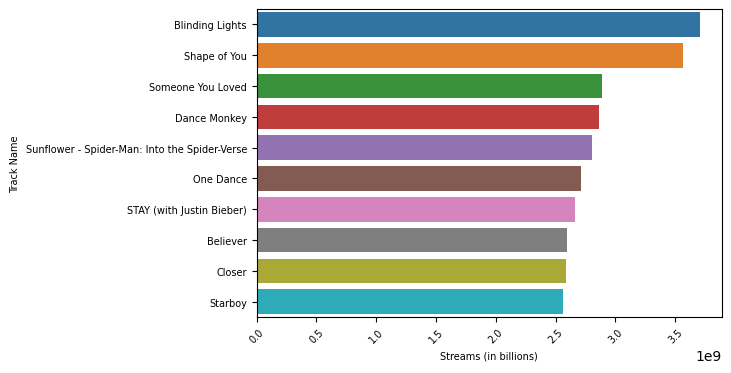

In [18]:
## Create a bar chart to visualize the top 10 most streamed songs
plt.subplots(1,1, figsize=(6,4))

sns.barplot(data=top_10_streamed, x='streams', y='track_name')
plt.xlabel('Streams (in billions)', fontsize=7)
plt.ylabel('Track Name', fontsize=7)
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)

plt.show()

### Relationship between Stream Count and other Variables

In [19]:
## Create a dataset to only include columns with numeric variables
df_int = df.select_dtypes(include='int64').copy()

## Drop the 'released_month' and 'released_day' columns as we will only analyze the data based on 'released_year'
df_int = df_int.drop(columns=['released_month','released_day'])

df_int.head()

,artist_count,released_year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,553,147,141381703,43,263,45,10,826,125,11,80,89,83,31,0,8,4
1,1,2023,1474,48,133716286,48,126,58,14,382,92,1,71,61,74,7,0,10,4
2,1,2023,1397,113,140003974,94,207,91,14,949,138,5,51,32,53,17,0,31,6
3,1,2019,7858,100,800840817,116,207,125,12,548,170,9,55,58,72,11,0,11,15
4,1,2023,3133,50,303236322,84,133,87,15,425,144,9,65,23,80,14,63,11,6


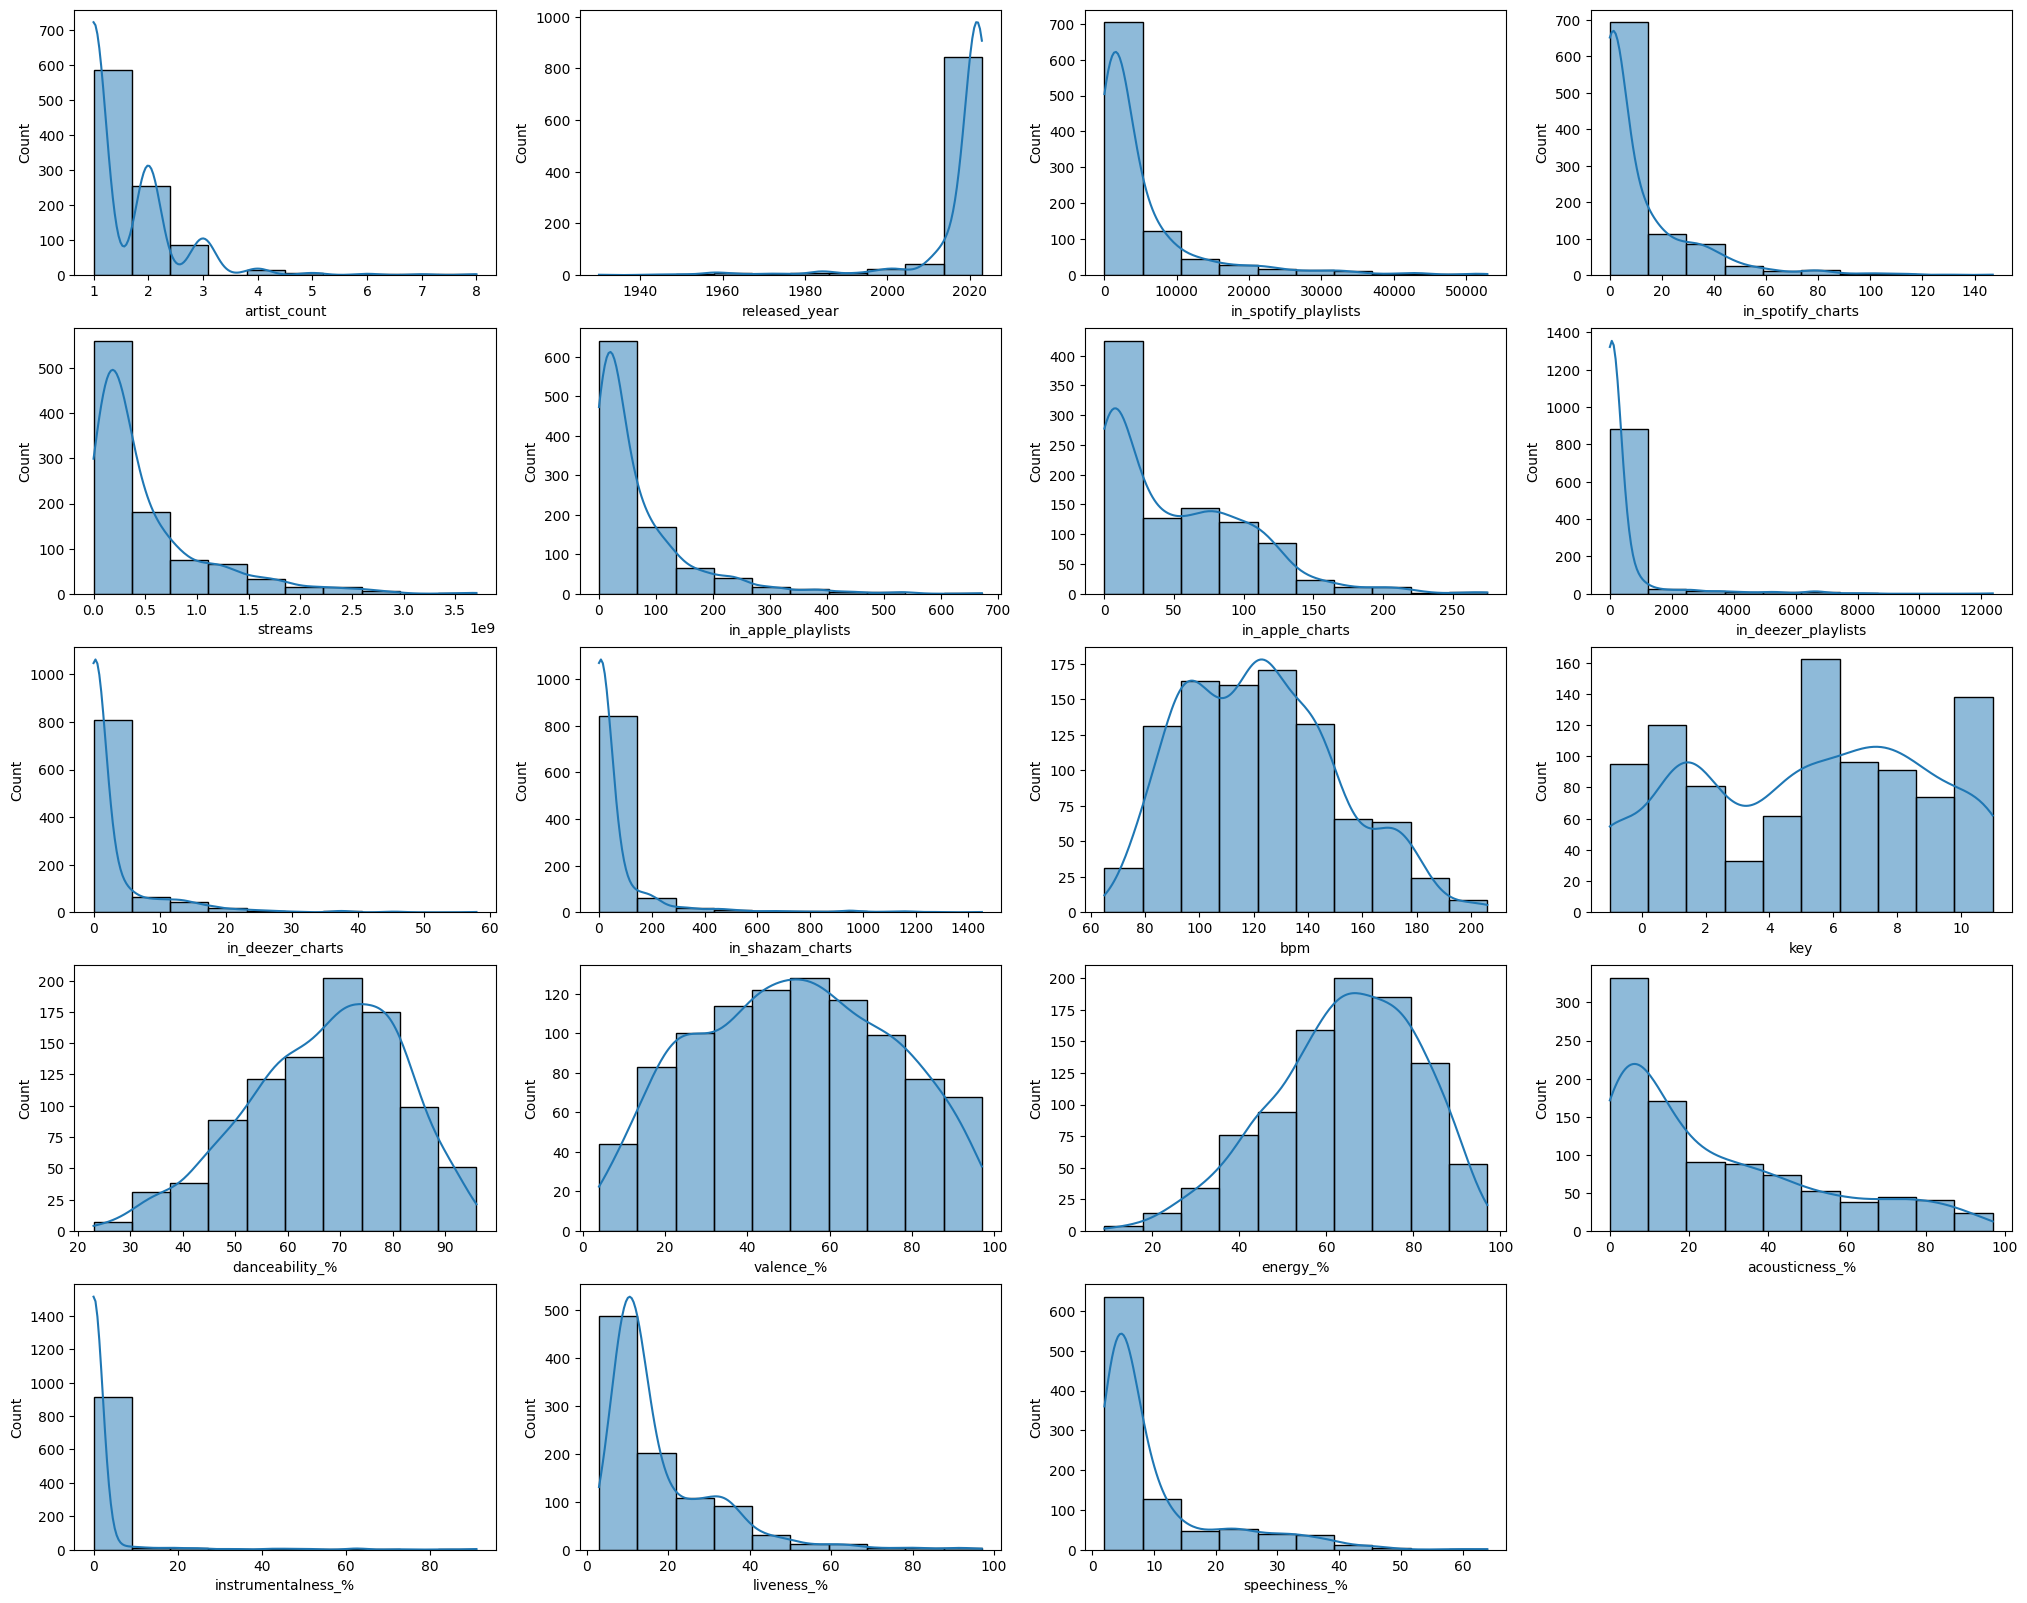

In [20]:
## Plot a histogram to visualize the descriptive statistics of each variable
plt.figure(figsize=(25,20))

for i, col in enumerate(df_int.columns):
    plt.subplot(5,4, i+1)
    sns.histplot(data=df_int, x=col, bins=10, kde=True)
    plt.tight_layout
    
plt.show()

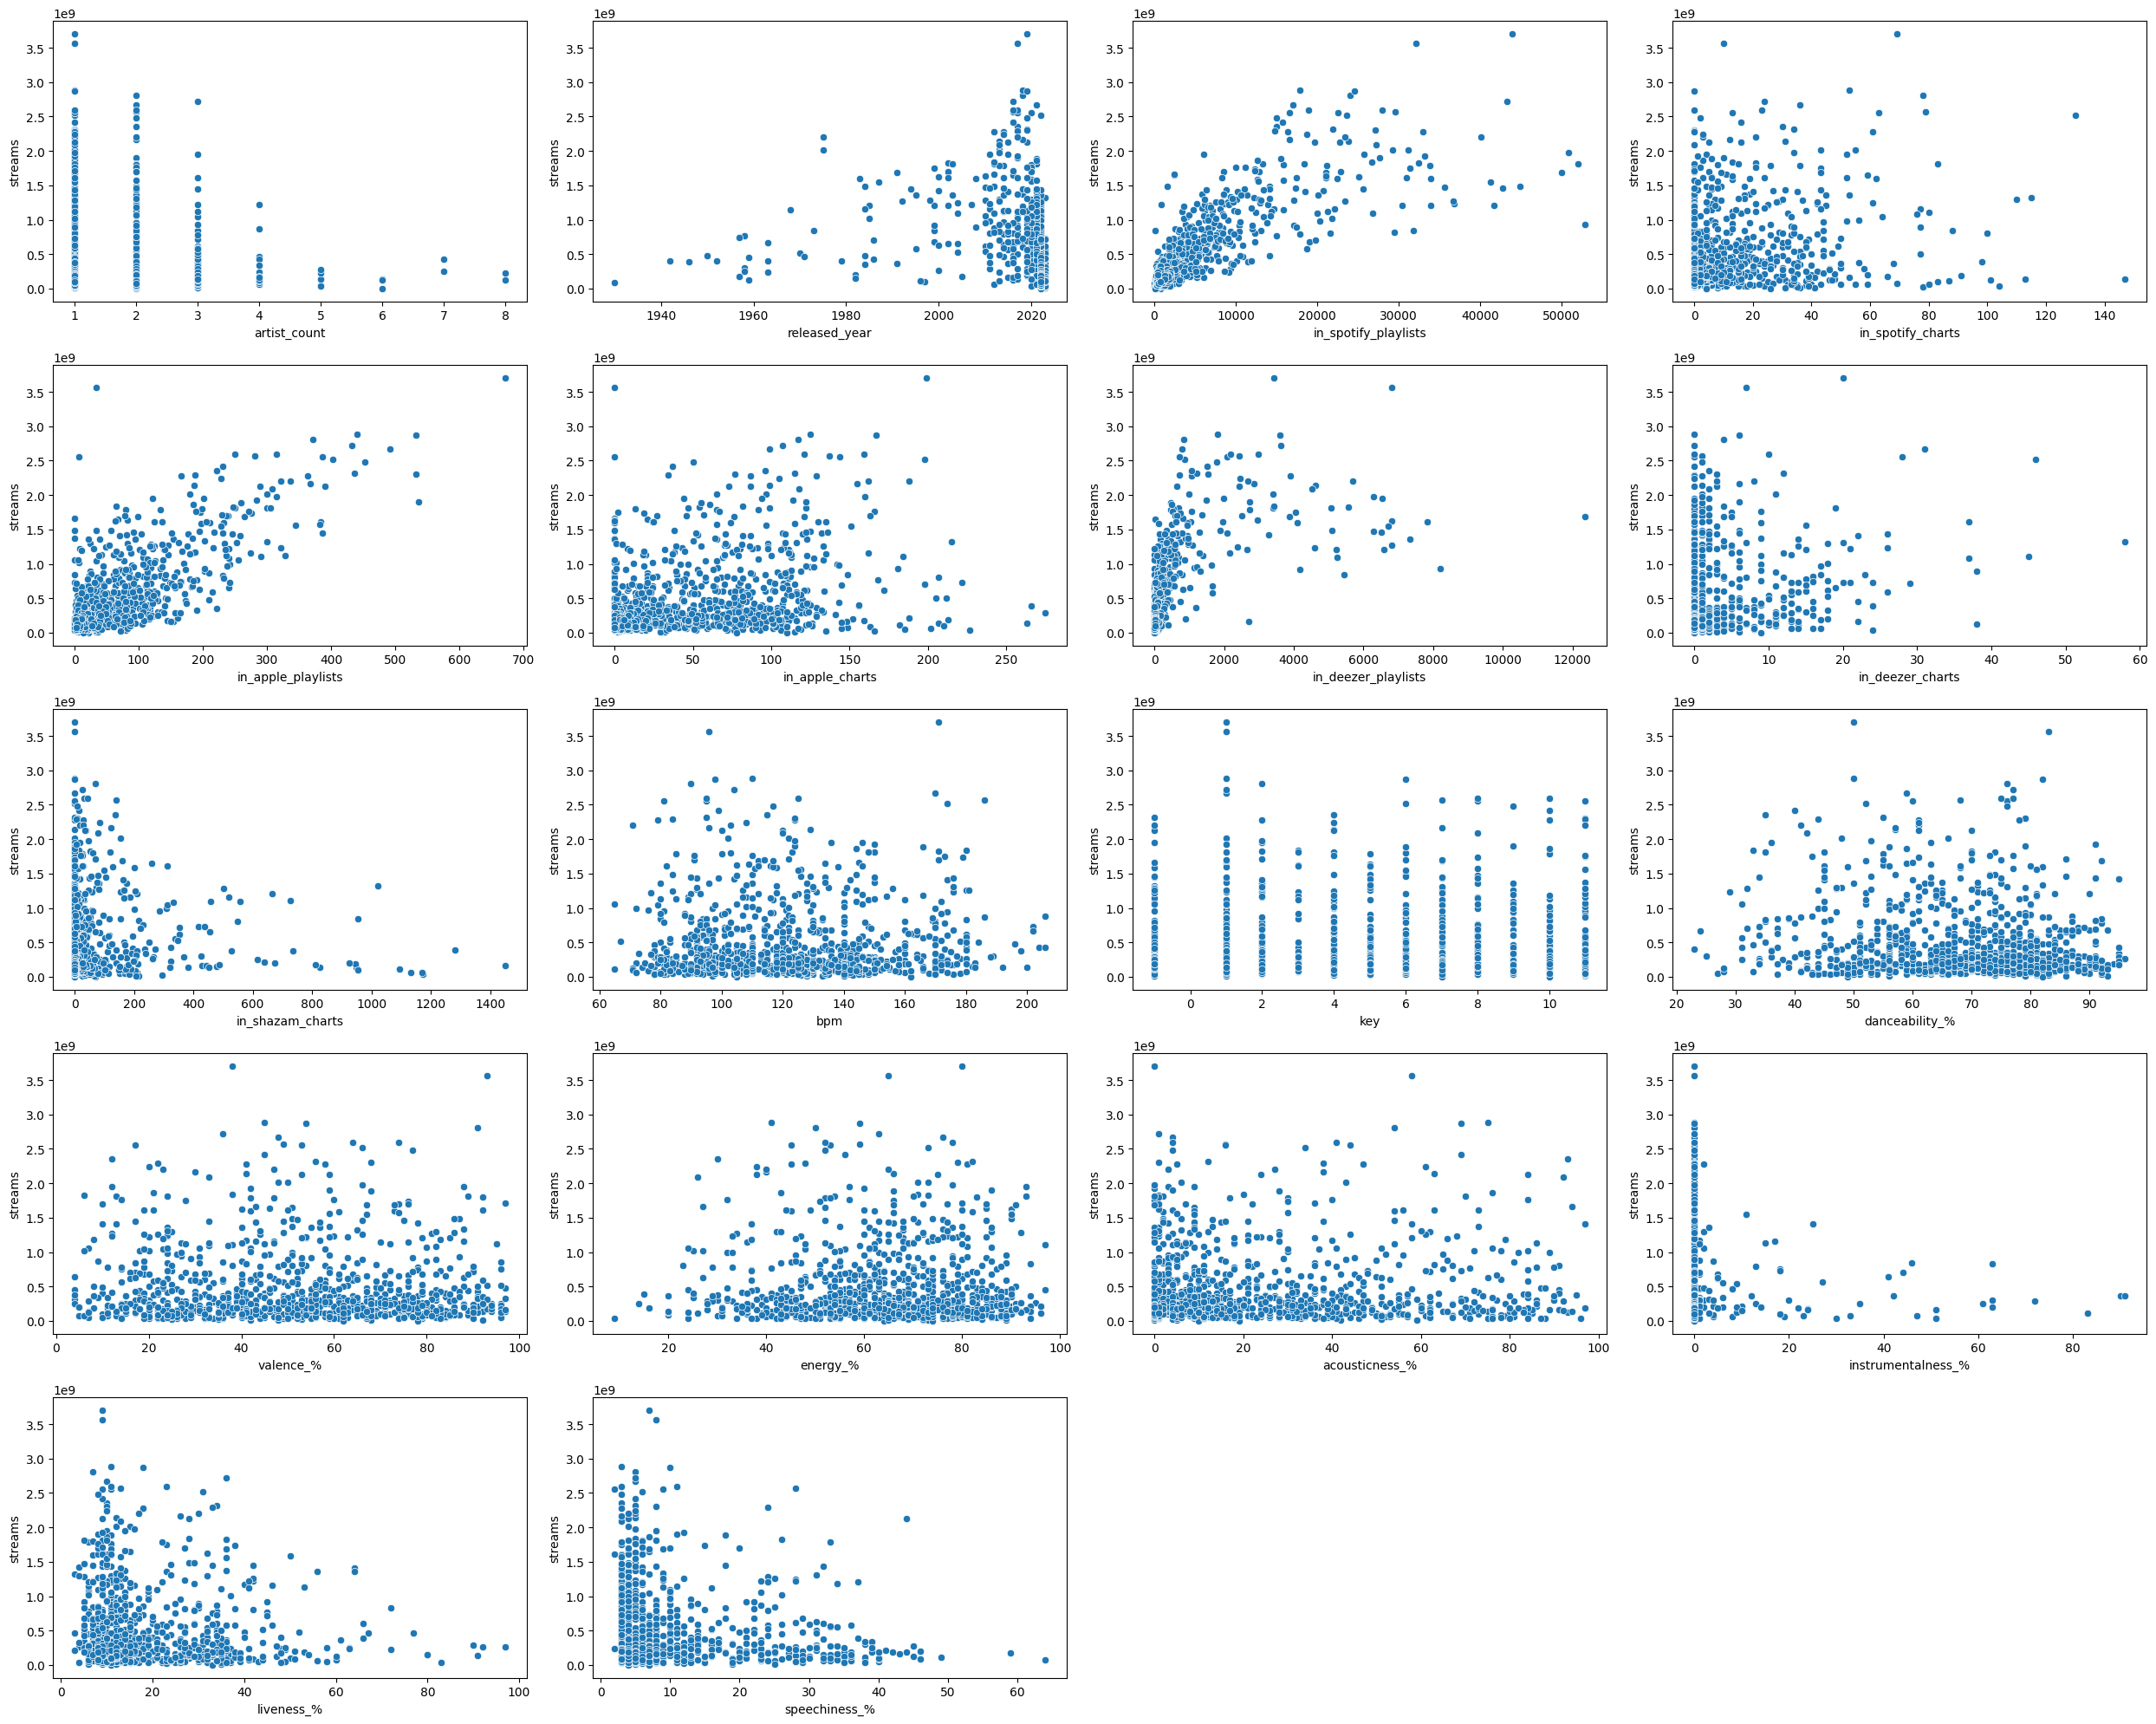

In [21]:
## Plot a scatterplot to visualize the spread of variables and its relationship to the stream count
plt.figure(figsize=(25,20))

int_no_stream = [col for col in df_int.columns
                   if col != 'streams']

for i, col in enumerate(int_no_stream):
    plt.subplot(5,4, i+1)
    sns.scatterplot(data=df_int, x=col, y='streams')
    
plt.tight_layout()
plt.show()

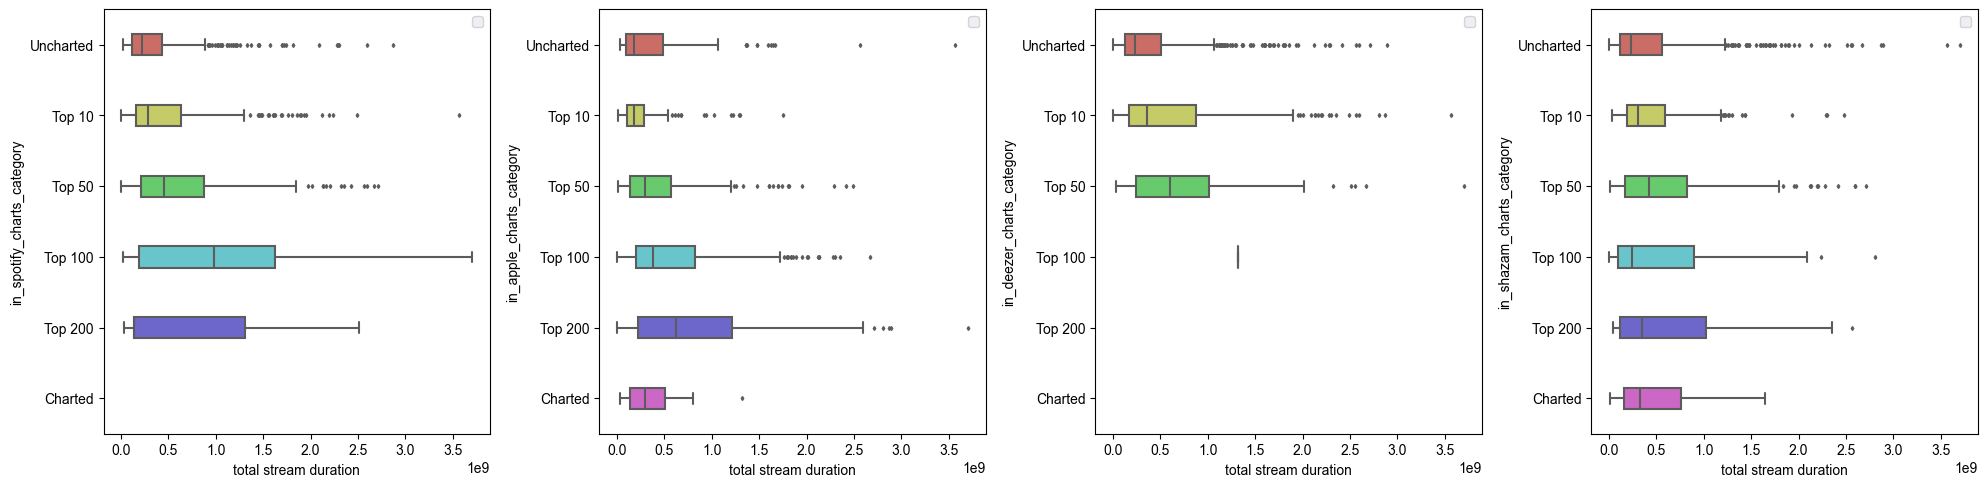

In [22]:
## Create a boxplot for total stream duration vs chart placement category
fig, ax = plt.subplots(1,4, figsize=(20,5))

sns.set(font_scale = 0.9)
custom_order = ['Uncharted','Top 10','Top 50','Top 100','Top 200','Charted']

## For Spotify charts
sns.boxplot(data=df, x='streams', y='in_spotify_charts_category', order=custom_order, palette=sns.color_palette('hls'), width=0.3, fliersize=2, ax=ax[0])
ax[0].legend([])
ax[0].set_xlabel(xlabel='total stream duration')
## For Apple charts
sns.boxplot(data=df, x='streams', y='in_apple_charts_category', order=custom_order, palette=sns.color_palette('hls'), width=0.3, fliersize=2, ax=ax[1])
ax[1].legend([])
ax[1].set_xlabel(xlabel='total stream duration')
## For Deezer charts
sns.boxplot(data=df, x='streams', y='in_deezer_charts_category', order=custom_order, palette=sns.color_palette('hls'), width=0.3, fliersize=2, ax=ax[2])
ax[2].legend([])
ax[2].set_xlabel(xlabel='total stream duration')
## For Shazam charts
sns.boxplot(data=df, x='streams', y='in_shazam_charts_category', order=custom_order, palette=sns.color_palette('hls'), width=0.3, fliersize=2, ax=ax[3])
ax[3].legend([])
ax[3].set_xlabel(xlabel='total stream duration')

plt.tight_layout()
plt.show()

#### Observations

**1. Artist Count**
   - Tracks with only 1 artist seem to be more popular and streamed more.
  
**2. Year of Release**
   - Newer songs tend to be streamed more, as shown in both the histogram and scatterplot, but older songs that dates back up to 1930 received a lot of streaming too.
   - The older songs that received a lot of streaming could be classic songs, or songs that were brought back to popularity due to some usage in social media.

**3. Presence in Platform Playlists**
   - The histogram for `in_spotify_playlists`, `in_apple_playlists`, and `in_deezer_playlists` are all skewed to the left. The scatterplot for these columns also shows that huge number of tracks populate the lower values. This means that most of the top streamed songs are not included in the subscriber's playlist.
   - These findings, combined with the findings for the `released_year` column could mean that these top streamed songs are new songs, which typically receives a lot of streaming, or which have not yet been added to most playlist. This could also mean that the number of streaming a track receives does not necessarily mean a subscriber will like them.

**4. Presence in Platform Charts**
   - The histogram for `in_spotify_charts`, `in_apple_charts`, `in_deezer_charts`, and `in_shazam_charts` are also skewed to the left. However, since the values for the charts indicate that the lower numbers indicate a higher placement in the charts, or a value of zero means that a track does not place in a chart, the histograms and scatterplots are not enough to visualize the relationship, hence, the creation of new columns for chart classification.
   - There are top streamed songs that did not place in a chart for both Spotify and Deezer.
   - Uncharted tracks have shorter total streaming duration for Spotify, Deezer, and Shazam, however, the tracks that placed in the Top 10 charts have the shortest total streaming duration in Apple.
   - The tracks in Spotify that placed within the top 101 to 200 in Spotify received a largely varying streaming time, having both tracks that has the one of the lowest and the highest streaming duration, and the highest interquartile range.

**5. BPM**
   - The BPM with the most streamed music is 120, with 90 BPM follows closely. Tracks with high BPM values have few number of streams.
   - Listeners prefer to stream music with moderate speed.

**6. Key**
   - There are no streamed music with the key 0 (C).
   - The music key with the most streams is 1 (C#), while the least is 3 (D#).
   - The amount of streams for the other keys have small variations.

**7. Track Metrics**
   - **7.1 Danceability**
     - Listeners stream more to danceable tracks, as shown in the histogram with the highest amount of streams in 70%.
   - **7.2 Valence**
     - The highest amount of stream is at the 50% valence. The number of tracks and amount of streams seem to vary only in small amounts as the valence value increases or decreases from 50%.
     - This findings could mean that the mood of the top streamed songs is neutral, as it includes songs from different types of moods.
   - **7.3 Energy**
     - The most number of streams are also at the 70% energy value. This could be related to listeners preference to danceable tracks.
   - **7.4 Acousticness**
     - The histogram shows a left-skewed plot, which means that a considerable amount of top streamed songs are not acoustic.
     - In the scatterplot, however, the findings seem to be not biased to non-acoustic songs, as some points still populate the chart in the higher acoustic levels, with the most time of streaming present in the higher levels.
     - Based on this findings, tracks that are partially acoustic gain more listening time compared to non-acoustic tracks. It is only the large amount of non-acoustic tracks that contribute to the large amount of streaming time.
   - **7.5 Instrumentalness**
     - The histogram and scatterplot both show that listeners prefer to listen to tracks that have both music and singing, as the plot is skewed to the left and populates in the lowest values of instrumentalness.
   - **7.6 Liveness**
     - The histogram and scatterplot both show that listeners prefer to listen to recorded tracks, as the plot is skewed to the left and populates in the lower values of liveness.
   - **7.7 Speechiness**
     - The histogram and scatterplot both show that listeners prefer to listen to tracks with more singing than speech.

#### Correlation Matrix

After checking the histograms, scatterplots, and boxplots for the relationship between variables and stream count, we will plot a heatmap correlating variables that could have high correlation to the number of streams.

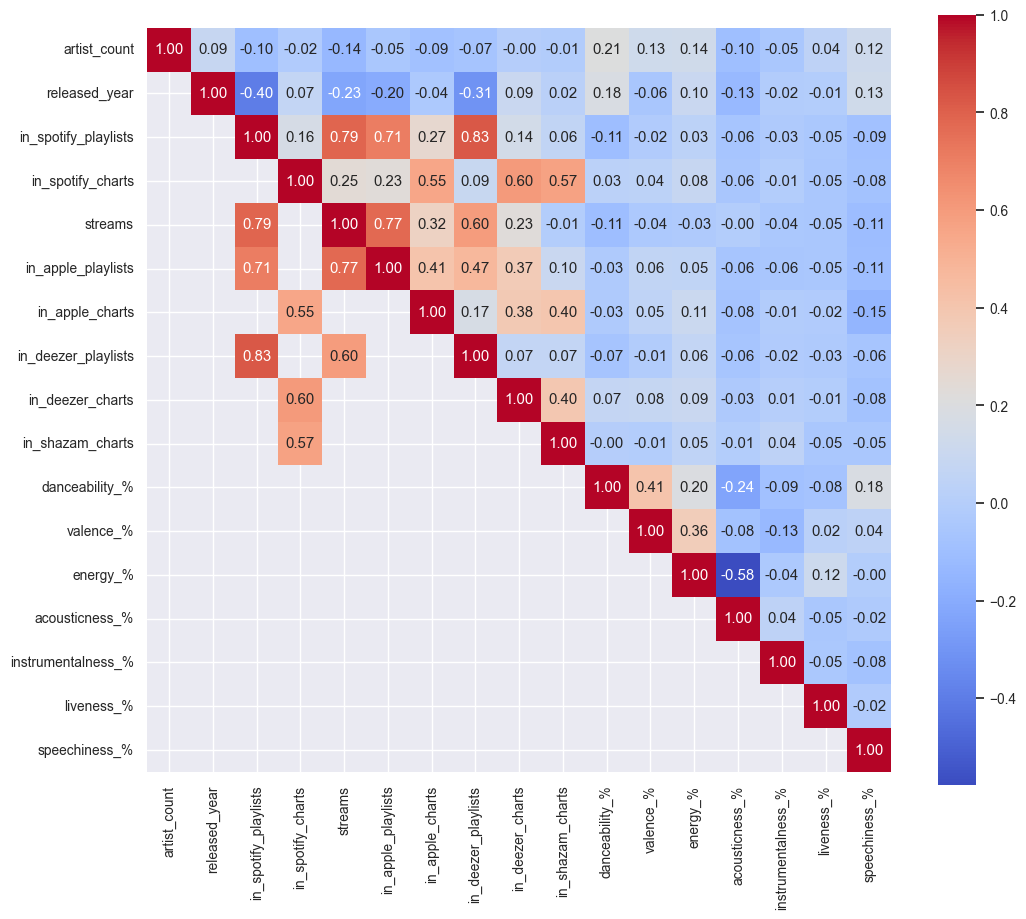

In [23]:
## Plot a correlation matrix
col_to_corr = ['artist_count','released_year','in_spotify_playlists','in_spotify_charts','streams','in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts',
               'in_shazam_charts','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']

corr_matrix = df_int[col_to_corr].corr()
mask = np.triu(corr_matrix, k=1)
mask = mask | (corr_matrix >= 0.5)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True, mask=~mask, cmap='coolwarm')
sns.set(font_scale=0.7)

plt.show()

Based on the correlation heatmap, the values in the columns `in_spotify_playlists` and `in_apple_playlists` have high correlation to the number of streams, with correlation values more than 0.70. Values in the `in_deezer_playlists` have a moderate to good correlation to the number of streams with a value of more than 0.50.

### Analysis of the Distribution of Track Metrics per Year of Release

#### **Danceability**

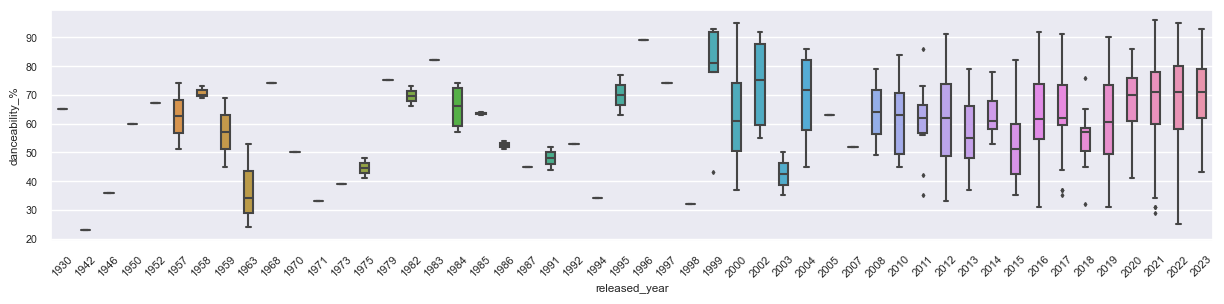

In [24]:
## Create a boxplot
plt.subplots(1,1, figsize=(15,3))

sns.boxplot(data=df, x='released_year', y='danceability_%', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

- Tracks that are released from the year 2020 to 2023 have almost similar median danceability, and almost similar interquartile range.
- Tracks that are released from 2008 to 2023 have wide range of danceability. It could be due to the majority of the top tracks were released in these years.
- The most danceable track in the top streamed songs was released in 2021.
- The least danceable track in the top streamed songs was released in 1942.

#### **Valence**

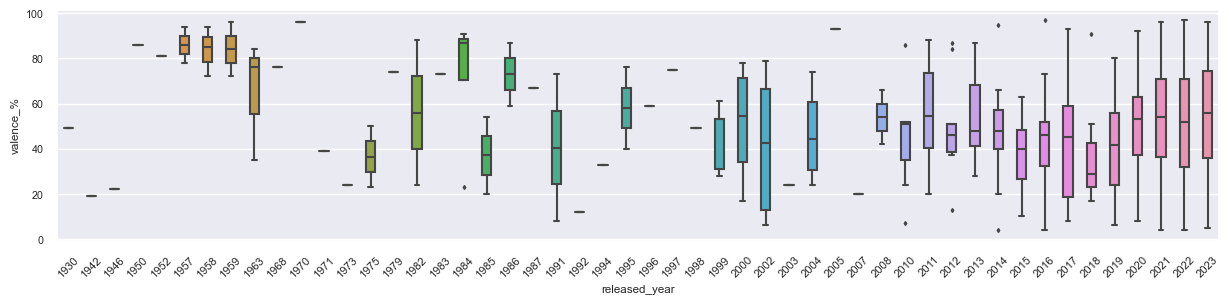

In [25]:
## Create a boxplot
plt.subplots(1,1, figsize=(15,3))

sns.boxplot(data=df, x='released_year', y='valence_%', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

- Tracks from 2020 to 2023 shows wide variety of moods in the top streamed songs, long whiskers extending from low valence to high valence, and median values at approximately 50%.
- Tracks from 2011 to 2023 has median valence at approximately 40 to 50%, with the exception of 2018. The range is also at the middle of the chart, ranging 20 to 70%, which shows the neutrality of the mood in the top streamed songs.

#### **Energy**

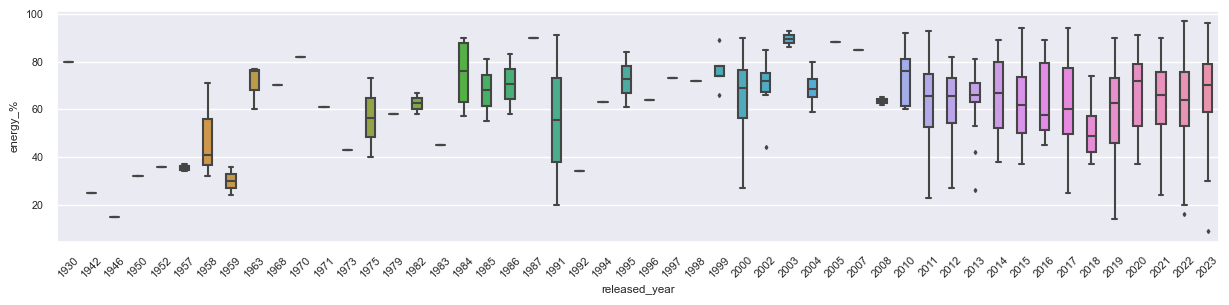

In [28]:
## Create a boxplot
plt.subplots(1,1, figsize=(15,3))

sns.boxplot(data=df, x='released_year', y='energy_%', width=0.4, fliersize=2)
plt.xticks(rotation=45, fontsize=8)

plt.show()

- Top tracks from 2011 to 2023 contains a wide range of tracks from energetic to less energetic, but with median values at the 50 to 60% energy percentage.
- The median values of the most streamed tracks are 50% or more, with the exception of 1958, 1959, and years with single tracks that made it to the most streamed. This shows that listeners prefer to listen to energetic tracks.